In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'])




**Objective**: Implement a Multiple Linear Regression model to predict house prices based on square footage, number of bedrooms, and age of the house.



#**1. LOADING DATA**
---

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS7 ASSIGNMENTS/house_prices_data.csv")

---
# **2. DATA EXPLORATION**
---

In [ ]:
df.head()

,Square_Footage,Num_Bedrooms,House_Age,House_Price
0,3674,1,61,608468.940708
1,1360,5,57,335254.995658
2,1794,5,51,402370.090653
3,1630,2,11,311854.298045
4,1595,5,38,379356.590435


In [ ]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
House_Age,0
House_Price,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.describe()

,Square_Footage,Num_Bedrooms,House_Age,House_Price
count,100.000000,100.000000,100.000000,100.000000
mean,2368.700000,2.970000,47.780000,449659.080684
std,1018.723617,1.480206,31.132684,154305.631374
min,521.000000,1.000000,0.000000,133560.988172
25%,1566.750000,1.000000,19.000000,313684.825488
50%,2468.000000,3.000000,50.000000,450938.501852
75%,3288.750000,4.000000,72.500000,568634.253802
max,3999.000000,5.000000,98.000000,756310.952144


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Square_Footage  100 non-null    int64  
 1   Num_Bedrooms    100 non-null    int64  
 2   House_Age       100 non-null    int64  
 3   House_Price     100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


---
# **3. Visualizing the data through Charts**


---



**3.1 Pairplot:**

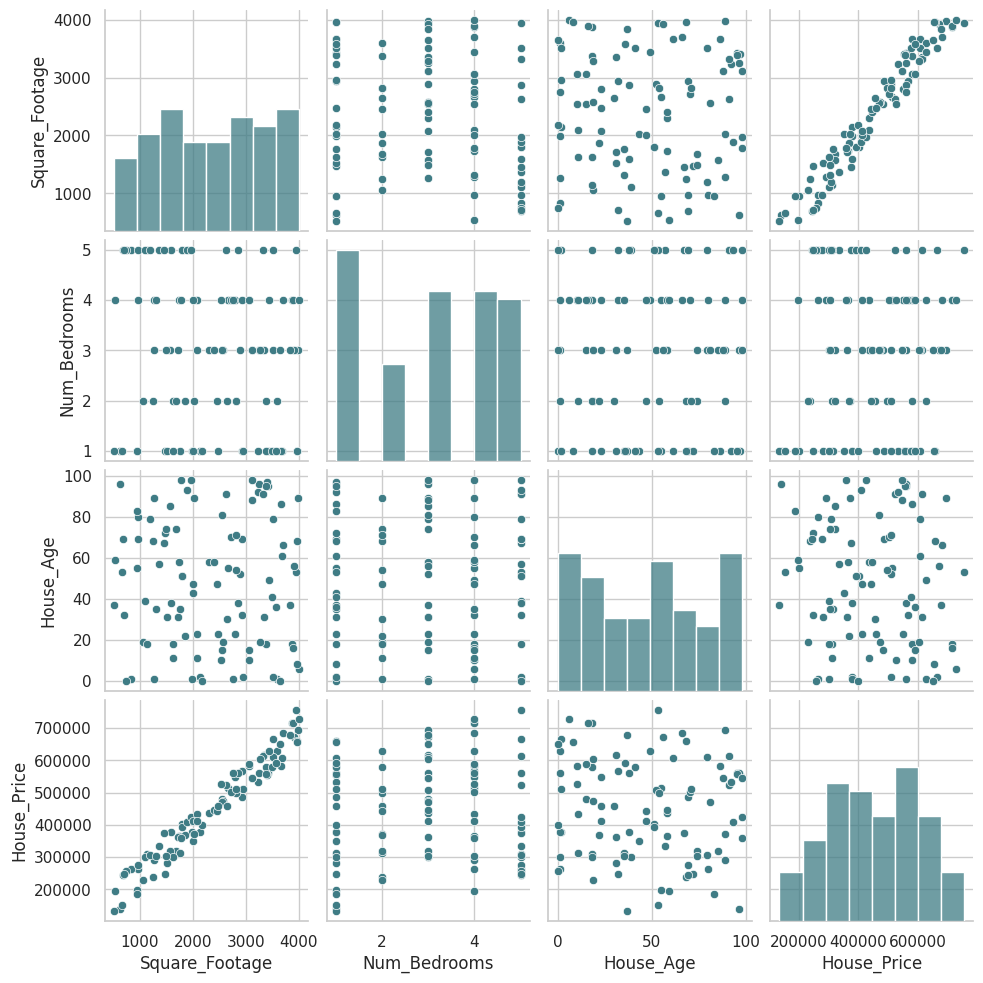

In [ ]:
# pairwise relationships
sns.pairplot(df, diag_kind='auto')
plt.show()

***Pair plot analysis ***

1. **Square footage** has a strong positive correlation with house prices, indicating that larger homes tend to be more valuable.

2. **Number of bedrooms** has a mixed relationship with price, contributing moderately but not as consistently as square footage

3. **House age** shows a scatered impact on price.

**3.2 Distribution Plot:**

---


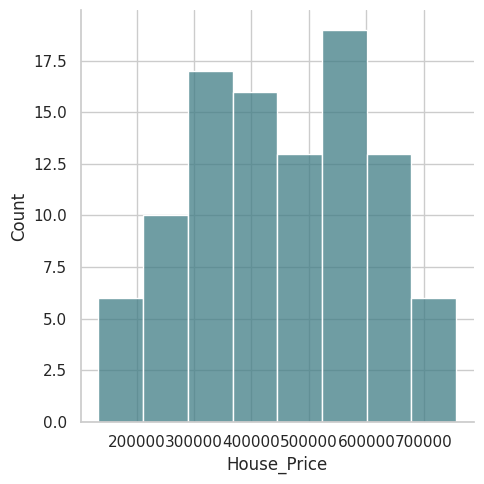

In [ ]:
sns.displot(data=df, x='House_Price', kind='hist', height=5, aspect=1)

**3.3 Scatter Plot ( Square Footage vs House Price )**

---



<Axes: xlabel='Square_Footage', ylabel='House_Price'>

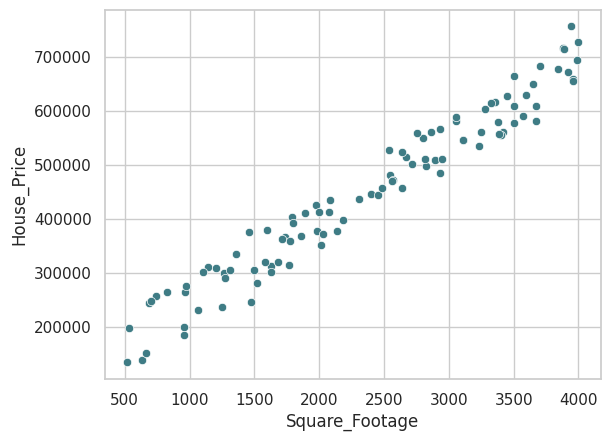

In [ ]:
sns.scatterplot(data=df, x="Square_Footage", y="House_Price")

 **3.4 Box Plot (Number of Bedrooms vs House Price):**

---

<Axes: xlabel='Num_Bedrooms', ylabel='House_Price'>

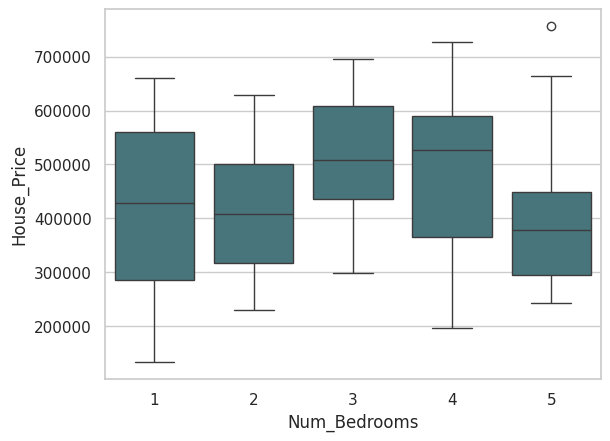

In [ ]:
sns.boxplot(data=df, x="Num_Bedrooms", y="House_Price")

**3.5 Scatter Plot ( House Age vs House Price ):**

---


<Axes: xlabel='House_Age', ylabel='House_Price'>

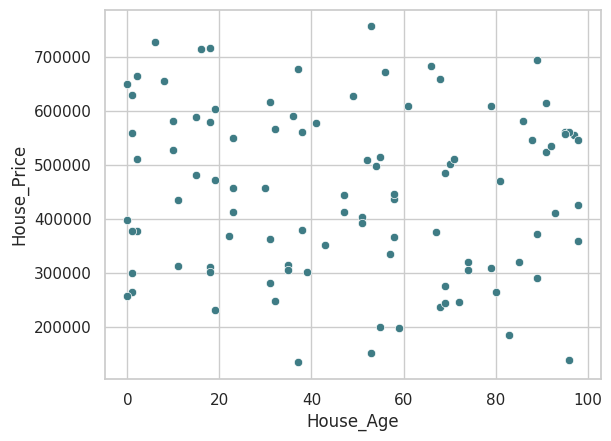

In [ ]:
sns.scatterplot(data=df, x="House_Age", y="House_Price")

**3.6 Correlation Heatmap:**

---

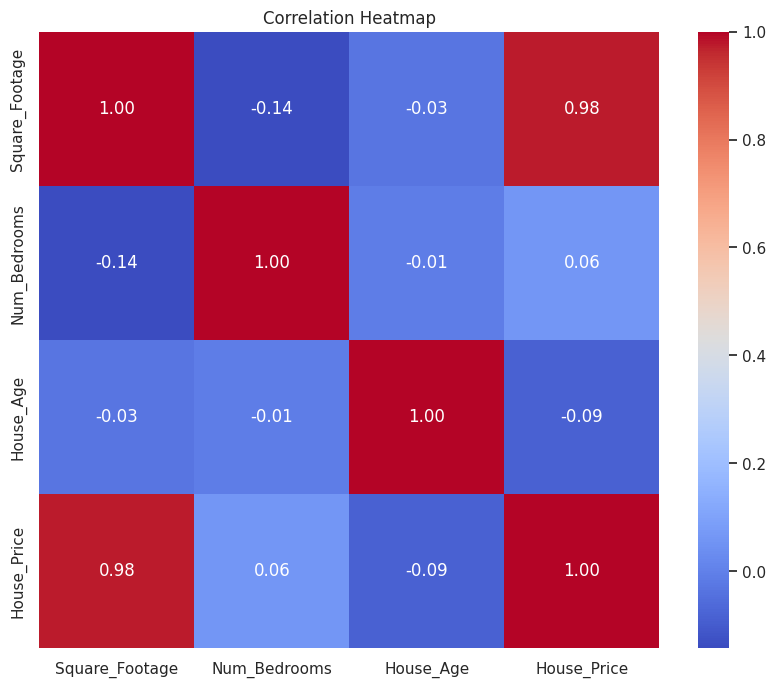

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


---
# **4. Spliting the Data:**
---

In [ ]:
x = df.drop(['House_Price'],axis=1)
y = df['House_Price']

In [ ]:
x

,Square_Footage,Num_Bedrooms,House_Age
0,3674,1,61
1,1360,5,57
2,1794,5,51
3,1630,2,11
4,1595,5,38
...,...,...,...
95,2817,2,71
96,1315,4,35
97,3842,3,37
98,955,1,83


In [ ]:
y

,House_Price
0,608468.940708
1,335254.995658
2,402370.090653
3,311854.298045
4,379356.590435
...,...
95,510486.244121
96,304914.268321
97,677489.704322
98,184956.137068


**Train test split**


---



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
X_train

,Square_Footage,Num_Bedrooms,House_Age
96,1315,4,35
46,1062,2,19
8,966,4,80
74,1275,4,89
71,1978,5,98
...,...,...,...
2,1794,5,51
79,2085,4,11
83,3961,1,8
98,955,1,83


In [ ]:
X_test

,Square_Footage,Num_Bedrooms,House_Age
45,3505,5,2
89,3277,3,19
11,1982,1,1
31,521,1,37
65,3112,3,88
50,2028,2,89
81,3573,1,36
42,689,5,69
75,534,4,59
57,2935,4,32


In [ ]:
y_train

,House_Price
29,199255.987051
83,655967.230860
95,510486.244121
87,308172.018551
56,392417.343785
...,...
99,358697.290635
71,425068.230044
91,151203.834945
4,379356.590435


In [ ]:
y_test

,House_Price
45,664347.991300
89,604167.085770
11,378049.282185
31,133560.988172
65,545849.668260
50,371997.740385
81,590810.584010
42,243613.297895
75,196780.225974
57,565599.956542


# ***10. Normalizing the data using StandardScaler***

In [ ]:
scaler = StandardScaler()

# Fit the scaler on X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled

array([[ 1.14609057,  1.35775379, -1.56099781],
       [ 0.91737153,  0.01676239, -1.01327928],
       [-0.38171252, -1.32422901, -1.59321655],
       [-1.84732009, -1.32422901, -0.43334201],
       [ 0.75185116,  0.01676239,  1.20981358],
       [-0.33556745, -0.65373331,  1.24203231],
       [ 1.21430502, -1.32422901, -0.46556075],
       [-1.67879027,  1.35775379,  0.59765757],
       [-1.83427909,  0.68725809,  0.2754702 ],
       [ 0.57429296,  0.68725809, -0.5944357 ],
       [ 0.99361121,  0.01676239, -0.62665444],
       [-0.89031145, -1.32422901,  0.69431378],
       [ 1.6416485 ,  0.68725809, -1.43212286],
       [-0.76993301,  1.35775379, -0.40112328],
       [-0.17807232, -1.32422901, -1.62543529],
       [ 0.53015419,  0.01676239,  0.04993904],
       [ 0.18506932,  0.01676239, -1.14215423],
       [ 0.1790504 ,  0.68725809, -1.30324791],
       [ 1.52227321,  0.68725809, -1.04549802],
       [-1.1190305 , -0.65373331,  0.56543884]])

---
# **5. Training the Model:**
---
**Multi Linear Regression**

---

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

model = lm.fit(X_train_scaled, y_train)

In [ ]:
y_pred = model.predict(X_test_scaled)

print(X_test,y_pred) # y^

    Square_Footage  Num_Bedrooms  House_Age
45            3505             5          2
89            3277             3         19
11            1982             1          1
31             521             1         37
65            3112             3         88
50            2028             2         89
81            3573             1         36
42             689             5         69
75             534             4         59
57            2935             4         32
23            3353             3         31
40            1475             1         72
72            3999             4          6
4             1595             5         38
17            2185             1          0
20            2891             3         52
38            2547             3         15
62            2541             4         10
18            3880             4         18
33            1247             2         68 [675275.17779933 594740.77346413 360114.93132903 129693.6108384
 553684.2177

In [ ]:
df_ai = pd.DataFrame({"y_test" : y_test, "y_pred"
                   : y_pred, "diff between y_pred and y_test" :abs(y_pred-y_test)})

In [ ]:
df_ai

,y_test,y_pred,diff between y_pred and y_test
45,664347.991300,675275.177799,10927.186500
89,604167.085770,594740.773464,9426.312306
11,378049.282185,360114.931329,17934.350855
31,133560.988172,129693.610838,3867.377334
65,545849.668260,553684.217782,7834.549522
50,371997.740385,367703.734867,4294.005518
81,590810.584010,593859.600398,3049.016388
42,243613.297895,231703.197112,11910.100783
75,196780.225974,189486.713251,7293.512724
57,565599.956542,560713.734371,4886.222171


In [ ]:
model.score(X_train_scaled, y_train)

0.9956952196333547

---
# **6. Evaluating the Model**

---
**Mean Squared Error (MSE) & r2 score**

---

In [ ]:
# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred) #how well our model fits the data

print(f'Mean Squared Error: {mse}')

print(f'R-squared: {r2}')

Mean Squared Error: 108289333.61090045
R-squared: 0.9961366208874216


**This is a very high R-squared value, suggesting that model fits the data extremely well.**

---
# **7. Visualizing the evaluated  Results:**
---

<Axes: xlabel='y_test', ylabel='y_pred'>

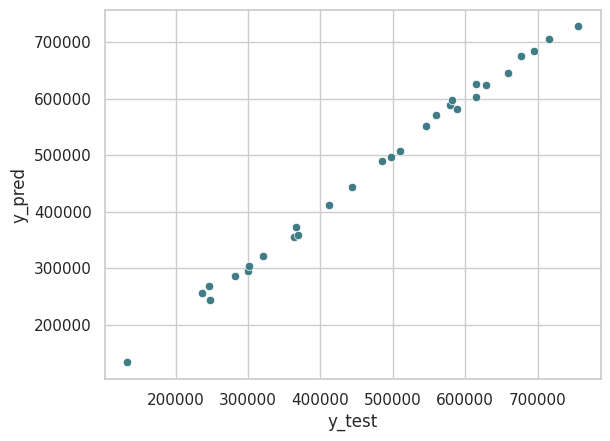

In [ ]:
sns.scatterplot(data=df_ai, x="y_test", y="y_pred")

---
# **8. Prediction Function:**

---

In [ ]:
# Function to predict house prices
def predict_house_price(square_footage, num_bedrooms, house_age):
    input_features = pd.DataFrame({
        'Square_Footage': [square_footage],
        'Num_Bedrooms': [num_bedrooms],
        'House_Age': [house_age]
    })
    input_features_scaled = scaler.transform(input_features)
    predicted_price = model.predict(input_features_scaled)
    return predicted_price[0]
# Collect user inputs
square_footage = int(input("Enter square footage: "))
num_bedrooms = int(input("Enter number of bedrooms: "))
house_age = int(input("Enter house age: "))

# Predict house price
predicted_price = predict_house_price(square_footage, num_bedrooms, house_age)
print("Predicted house price:", predicted_price)

Enter square footage: 2026
Enter number of bedrooms: 4
Enter house age: 20
Predicted house price: 425314.90446087805


# **9. Feature importance and visualization:**

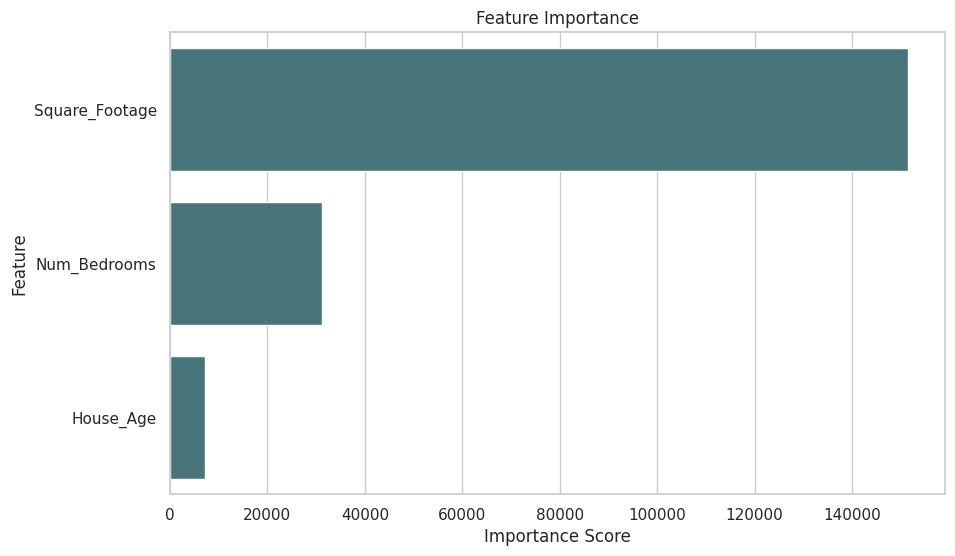

In [ ]:
# coefficients of the linear regression model
coefficients = model.coef_

# DataFrame to store feature names and their importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(coefficients)
})

# Sort the features by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()